# 1. 워드 임베딩(Word Embedding)
* 단어를 컴퓨타기 이해하고 , 효율적으로 처리 할 수 있더럭 단어를 벡터화하는 기술
* 단어를 밀집 벡터의 형태로 표현하는 방법
* 워드 임베딩 과정을 통해 나온 결과를 임베딩 벡터
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델에 입력으로 사용할 수있음


### 1-1. 인코딩
* 기계는 자연어를 이해할 수 없기 때문에 데이터를 기계가 이해 할 수 있도록 숫자 등으로 변환해주는 작업
* 자연어를 수치화된 벡터로 변환하는 작업

### 1-2. 희소 표현(Sparse Representation)
* 원-핫 인코딩을 통해서 나온 원-핫 백터들은 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 표현 방법
* 벡터 또는 행렬의 값이 대부분이 0으로 표현 되는 방법을 희소 표현이라고 함
* 원-핫 인코딩에 의해 만들어지는 벡터를 희소이라고 함


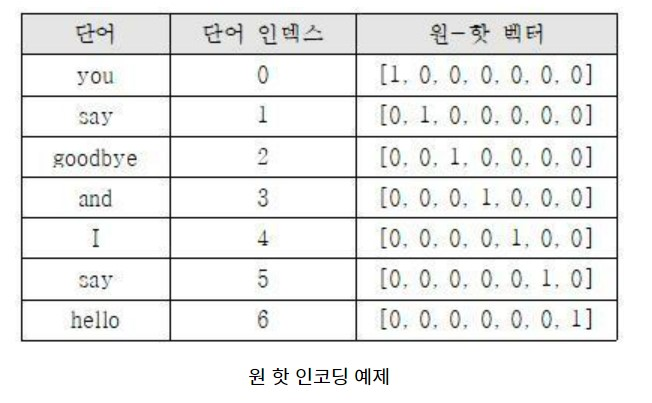

### 1-3. 희소 벡터의 문제점
* 희소 벡터의 특징은 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다는 것
* 원-핫 벡터는 벡터 표햔 방식이 매우 단순하며, 단순히 단어의 출현 여부만을 벡터에 표시할 수 있음
* 희소 벡터를 이용하여 문장 혹은 텍스트간 유사도를 계산해보면 원하는 유사도를 얻기 힘듬

### 1-4. 밀집 표현(Dense Repressentation)
* 벡터의 차원이 조밀해졌다는 의미
* 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞추는 표현 방식
* 자연어를 밀집 표현으로 변환하는 인코딩 과정에서 0과 1의 Binary값이 아니라 연속적인 실수 값을 가질 수 있음

> 밀집 표현으로 텍스트 유사도 측정이 가능


### 1-5. 밀집 표현의 장점
* 적은 차원으로 대상을 표현할 수 있음
* 더 큰 일반화 능력을 가지고 있음


### 1-6. 원-핫 벡터와 워드 임베딩이 차이

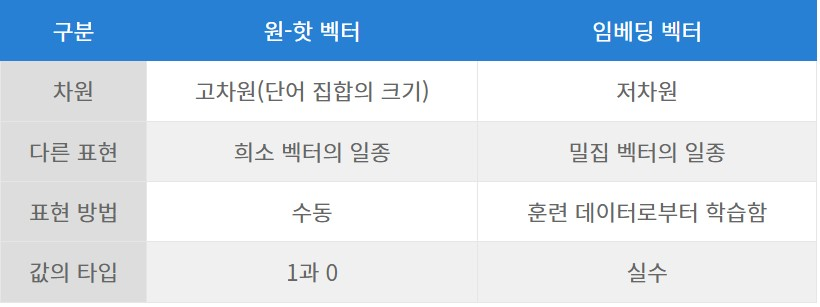

* 희소 표현 : 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] # 이 벡터의 차원은 10,000
* 밀집표현 : 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128
``` Ex) 10,000개의 단어를 가정

### 1-7. 차원 축소(Dimensionality Reducation)
* 희소 벡터를 밀집 벡터의 형태로 변환하는 방법
* 머신러닝에서 많은 피쳐들로 구성된 고차원 데이터에서 중요한 피쳐들만 뽑아 저차원의 데이터(행렬)로 변환하기 위해 사용

  - PCA(Principle Component Analysis)
  - 잠재 의미 분석(Latent Semantic Analysis)
  - 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)
  - SVD(Singualer Value Decomposion, SAD)

# 2. Word2Vec

### 2-1. 분산 표현(Distributed Representation)
* 분포 가설이라는 가정 하에 만들어진 표현 방법
* 분포 가설: "비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다"는 가설
* 분포 가설의 목표는 단어 주변의 단어들, window 크기에 따라 정의 되는 문맥의 의미를 이용해 단어를 벡터로 표현(분산 표현)하는 것
* 분산 표현으로 표현된 벡터들은 원-핫 벡터처럼 차원이 단어 집합의 크기일 필요가 없으므로, 벡터의 차원이 상대적으로 저차원으로 줄어듬
* 밀집표현을 분산 표현이라 부르기도 함
* 희소 표현에서는 각각의 차원이 각각의 독립적인 정보를 갖고 있지만 , 밀집에서는 하나의 차원이 여러 속성들이 버무려진 정보를 갖고 있음
* 밀집 표햔을 이용한 대표적인 학습 방법이 Word2Vec 임


### 2-2. Word2Vec이란?
* 분포 가설 하에 표현한 분산 표현을 따르는 워드 임베딩 모델
* GooGle이 2013년도 처음 공개
* 중심 단어와 주변의 단어들을 사용하여 단어를 예측하는 방식으로 임베딩을 만듬
* Word2Vec의 학습 방식에는 두가지 방식
  - CBOW(Contiuous Bag of Words)
  - Skip-Gram
  

### 2-3. CBOW(Continuous Bag of Words)
* 주변에 있는 단어들을 보고 중간에 있는 단어를 예측하는 방법
* 주변 단어(context)는 타겟 단어(target word)의 직전 n개 단어와 직후 n개 단어를 의미하며, 이 범위를 window라 부르고, n을 window size라고 부름
* 문장 하나에 대해 한 번만 학습을 진행하는 것은 아깝기 대문에 sliding window방식을 사용하여 하나의 문장을 가지고 여러 개의 학습 데이터를 만듬
* [word2Vec](https://wikidocs.net/22660)
* Word2Vec은 최초 입력으로 one-hot-vector를 받는데, 1*V 크기의 one-hot-vector의 각 요소와 hidden layer N개의 각 노드는 1대 1대응이 이뤄져야 하므로 가중치 행렬 W의 크기는 VXN이 됨
* 학습 코퍼스에 단어가 10.000개 있고 hidden layer의 노드는 300개로 지정하면 가중치 행렬 W는 10,000 * 300 행렬 형태가 된다
* 각각의 가중치 행렬은 랜덤한 값으로 초기화 되어있고 학습 시 target word를 맞추는 과정에서 W가 게속되어 조정됨
* 예를 들어 4개의 단어들이 target word예측에 사용될 때 각각의 단어들에 해당하는 W의 임베딩 벡터들 4개의 평균을 사용함
* 평균 벡터는 두 번째 가중치 행렬 W와 곱해지며 곱해진 결과로는 target word의 원 핫 벡터와 크기가 동일한 벡터를 얻을 수 있음
* 최종 출력 값 벡터는 다중 클래스 분류 문제를 위한 일종의 스코어 벡터이며 0과 1 사이의 값을 가지는데 이는 중심 단어일 확률을 나타냄
* 스코어 벡터 값은 정답 레이블에 해당하는 target word의 원-핫 벡터 내 1의 값에 가까워져야함
* 스코어 벡터와 원-핫 벡터의 오차를 줄이기 위해 손실 함수(cross-entropy)함수를 사용함



### 2-4. Skip-gram
* 중심 단어에서 주변 단어를 예측
* 중심 단어를 sliding window 하면서 학습 데이터를 증강
* 중심 단어를 가지고 주변 단어를 예측하는 방법이기 떄문에 projection layer에서 벡터들 간의 평균을 구하는 과정이 없으며 대신 output layer를 통해 벡터가 2n개 만큼 나옴

### 2-5. CBOW vs Skip-gram
* Skip-gram이 CBOW에 비해 여러 문맥을 고려하기 때문에 Skip-gram의 성능이 일반적으로 더 좋음
* Skip-gram이 단어 당 학습 횟수가 더 많고, 임베딩의 조정 기회가 많으므로 더 정교한 임베딩 학습이 가능

```
작고 귀여운 강아지 문 앞에 앉아 있다
```
|     | CBOW |  |
| --- | --------- | ----------------- |
| Input  | Output | 학습기회 |
| 귀여운, 강아지 | 작고 | 1 |
| 작고, 강아지, 문 | 귀여운 | 1 |
| 작고, 귀여운, 문, 앞에 | 강아지 | 1 |
| 귀여운, 강아지, 앞에, 앉아 | 문 | 1 |
| 강아지, 문, 앉아, 있다 | 앞에 | 1 |
| 앞에, 앉아 | 있다 | 1 |


|     | Skip-gram |  |
| --- | --------- | ----------------- |
| Input  | Output | 학습기회 |
| 작고 | 귀여운, 강아지 | 2 |
| 귀여운 | 작고, 강아지, 문 | 3 |
| 강아지 | 작고, 귀여운, 문, 앞에 | 4 |
| 문 | 귀여운, 강아지, 앞에, 앉아 | 4 |
| 앞에 | 강아지, 문, 앉아, 있다 | 4 |
| 앉아 | 문, 앞에, 있다 | 3 |
| 있다 | 앞에, 앉아 | 2 |

### 2-6. Word2Vec의 한계점
* 단어의 형태학적 특성을 반영하지 못함
- 예) teach, teacher, tearchers 와 같이 세 단어는 의미적으로 유사한 단어지만 각 단어를 개별단어로 처리하여 세 단어 모두 벡터 값이 다르게 구성됨
* 단어 빈도 수의 영향을 많이 받아 희소한 단어를 임베딩하기 어려움
* OVV(out of vocabulary)의 처리가 어려움
  - 새로운 단어가 등장하면 데이터 전체를 다시 학습시켜야 함
* 단어 사전의 크기가 클수록 학습하는데 오래걸림
  - 단어 사전의 크기가 수 만개 이상인 경우, Word2Vec은 학습하기에 무거운 모델이 됨


### 2-7. Word2Vec의 학습 트릭
* Subsampling Frequent Words
  - 자연어 코퍼스에서 자주 등장하는 단어의 학습량을 확룰적인 방법으로 줄이는 것
  - 등장 빈도가 높을 수록 단어가 업데이트 될 기회가 많기 떄문
  - $$ P(w_i) = 1 - \sqrt\frac{t}{(w_i)}$$
  - f(Wi)는 해당 단어가 말뭉치에 등장할 비율(해당 단어 빈도/전체 단어수)
  - t는 사용자가 지정해주는 값으로 연구팀에서는 0.00001을 권장
  - 예) 만약 f(Wi)가 0.01로 나타나는 빈도 높은 단어는 위 식으로 계산한 P(Wi)가
  0.9684이므로, 100번의 학습 기회 가운데 96번 정도는 학습에서 제외하게 됨
  - 등장 비율이 적어 P(Wi)가 0에 가깝다면 해당 단어가 나올때 마다 빼놓지 않고 학습
  - 학습량을 효과적으로 줄여 계산량을 갑소시키는 전략
* Negative Sampling
  - 학습하는 중심단어와 주변 단어를 외에, 이 단어들과 별 연관없는 수많은 단어의 임배딩까지 업데이트하는 것은 비효율적임
  - 무작위로 네거티브 셈플들을 하나의 중심 단어에 대한 [주변단어 + 네거티브 샘플들]로만 구성된 작은 단어 집합을 만들어서 학습하면 훨씬 효율작으로 학습할 수 있을 것
  - Postive sample은 1로, negatuve sample은 0으로 간주하는 binary classification 형식의 할습 방법을 사용
  - Skip-Gram과 다르게, target words에 대해서 단어 사전의 subset에 대해서만 학습을 진행 할 수 있으므로 효율적으로 학습
  -  $P(w_i)_n = (\frac{f(w_i)}{ \sum_{j=1}^{n} f(w_i)})^3 / _4$

### 3. FastText
* 분포 가설하에 표현한 분산 표현을 따르는 또 다른 임베딩 모델
* 2017년 페이스북에서 공개한 워드 임베딩 기법


### 3-1. FastText 동작원리
* <, >는 단어의 경계를 나타내기 위한 특수 기호
* 단어의 먼저 <,>로 감산 후, 설정한 n-gram의 값에 따라 앞에서부터 단어를 쪼갬
* 마지막에 본 단어를 걸명하기 위해 <, >으로 감싸진 전체 단어를 하나 추가함

```
n-gram은(n=3)
대한민국 -> <대한, 대한민, 한민국, 민국>, <대한민국>
```
* n-gram 설정은 최고값과 최댓값을 설정할 수 있음

### 3-2. FastText의 장점
* 오타나 모르는 단어에 대한 대응
* 단어 집합 내 빈도 수가 적었던 단어에 대한 대웅
* 자연어 코퍼스 내 노이즈에 대응


### 과제.
임베딩 방법론 중 'GloVe'의 작동 원리에 대해 알아보자

# 4. 워드 임베딩 구축하기


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [3]:
dataset = fetch_20newsgroups(shuffle=True, random_state=10, remove=('headers', 'footers', 'quotes'))
# dataset
# dataset.data
dataset = dataset.data

In [4]:
dataset[0]

'Someone in Canada asked me to send him some public domain DES file\nencryption code I have.  Is it legal for me to send it?\n\nThanx.\n--\nEschew Obfuscation\n\nRob deFriesse                    Mail:  rj@ri.cadre.com\nCadre Technologies Inc.          Phone:  (401) 351-5950\n222 Richmond St.                 Fax:    (401) 351-7380\nProvidence, RI  02903'

In [5]:
# 데이터셋 총 개수
len(dataset)

11314

In [6]:
# document 필드를 가진 데이터프레임으로 변환
news_df = pd.DataFrame({'document':dataset})
news_df

,document
0,Someone in Canada asked me to send him some pu...
1,\n\nI see . . . you're not running Ultrix!\n\n...
2,"\nFor the first Move incident (no bomb, severa..."
3,"Okay, I'm trying to install NCSA telnet on a c..."
4,Hi everyone. I recently posted about how I rec...
...,...
11309,We have a minivas-2 and we want to record to a...
11310,Videonics Title maker System\n================...
11311,"\n\nAnas, of course ! The YAHUD needed blood f..."
11312,From: push@media.mit.edu (Pushpinder Singh)\nS...


In [7]:
# 데이터셋에 결측값이 있는지 확인하기
news_df.replace('', float('NaN'), inplace=True)
print(news_df.isnull().values.any())

True


In [8]:
# 데이터셋의 결측값을 제거 후 데이터셋 총 개수
news_df = news_df.dropna().reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수: {len(news_df)}')

필터링된 데이터셋 총 개수: 11096


In [9]:
11314 - 11096

218

In [10]:
news_df

,document
0,Someone in Canada asked me to send him some pu...
1,\n\nI see . . . you're not running Ultrix!\n\n...
2,"\nFor the first Move incident (no bomb, severa..."
3,"Okay, I'm trying to install NCSA telnet on a c..."
4,Hi everyone. I recently posted about how I rec...
...,...
11091,We have a minivas-2 and we want to record to a...
11092,Videonics Title maker System\n================...
11093,"\n\nAnas, of course ! The YAHUD needed blood f..."
11094,From: push@media.mit.edu (Pushpinder Singh)\nS...


In [11]:
# 열을 기준으로 중복된 데이터를 제거
processed_news_df = news_df.drop_duplicates(['document']).reset_index(drop=True)
processed_news_df

,document
0,Someone in Canada asked me to send him some pu...
1,\n\nI see . . . you're not running Ultrix!\n\n...
2,"\nFor the first Move incident (no bomb, severa..."
3,"Okay, I'm trying to install NCSA telnet on a c..."
4,Hi everyone. I recently posted about how I rec...
...,...
10988,We have a minivas-2 and we want to record to a...
10989,Videonics Title maker System\n================...
10990,"\n\nAnas, of course ! The YAHUD needed blood f..."
10991,From: push@media.mit.edu (Pushpinder Singh)\nS...


In [12]:
11096 - 10993

103

In [13]:
len(processed_news_df.iloc[0][0])

343

In [14]:
# 데이터셋에 특수 문자를 제거
processed_news_df['document'] = processed_news_df['document'].str.replace('[^a-zA-Z]', ' ')
processed_news_df

<ipython-input-14-767603303ad8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  processed_news_df['document'] = processed_news_df['document'].str.replace('[^a-zA-Z]', ' ')


,document
0,Someone in Canada asked me to send him some pu...
1,I see you re not running Ultrix ...
2,For the first Move incident no bomb several...
3,Okay I m trying to install NCSA telnet on a c...
4,Hi everyone I recently posted about how I rec...
...,...
10988,We have a minivas and we want to record to a...
10989,Videonics Title maker System ...
10990,Anas of course The YAHUD needed blood for...
10991,From push media mit edu Pushpinder Singh Su...


In [15]:
# 데이터셋에 길이가 너무 짧은 단어를 제거(단어의 길이가 2이하)
processed_news_df['document'] = processed_news_df['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
processed_news_df

,document
0,Someone Canada asked send him some public doma...
1,see you not running Ultrix Steve
2,For the first Move incident bomb several membe...
3,Okay trying install NCSA telnet couple okay wh...
4,everyone recently posted about how received ba...
...,...
10988,have minivas and want record Abekas have most ...
10989,Videonics Title maker System about monthes old...
10990,Anas course The YAHUD needed blood for the mat...
10991,From push media mit edu Pushpinder Singh Subje...


In [16]:
# 전체 길이가 200 이하이거나 전체 단어 개수가 5개 이하인 데이터를 필터링
processed_news_df = processed_news_df[processed_news_df.document.apply(lambda x: len(str(x)) > 200 and len(str(x).split()) > 5)].reset_index(drop=True)
processed_news_df

,document
0,Okay trying install NCSA telnet couple okay wh...
1,everyone recently posted about how received ba...
2,one should EVER rely just magazine determine w...
3,Rick Anderson replied letter with article ELp ...
4,Description External Tank option for SSF redes...
...,...
8194,loved Dan Kelly was USA when first got hooked ...
8195,have minivas and want record Abekas have most ...
8196,Videonics Title maker System about monthes old...
8197,Anas course The YAHUD needed blood for the mat...


In [17]:
# 전체 단어에 대한 소문자 변환
processed_news_df['document'] = processed_news_df['document'].apply(lambda x: x.lower())
processed_news_df

,document
0,okay trying install ncsa telnet couple okay wh...
1,everyone recently posted about how received ba...
2,one should ever rely just magazine determine w...
3,rick anderson replied letter with article elp ...
4,description external tank option for ssf redes...
...,...
8194,loved dan kelly was usa when first got hooked ...
8195,have minivas and want record abekas have most ...
8196,videonics title maker system about monthes old...
8197,anas course the yahud needed blood for the mat...


In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
stop_words = stopwords.words('english')
print(len(stop_words))
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [21]:
# 데이터셋에 불용어를 제외하여 띄어쓰기 단위로 문장을 분리
tokenized_doc = processed_news_df['document'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [s_word for s_word in x if s_word not in stop_words])
tokenized_doc

0       [okay, trying, install, ncsa, telnet, couple, ...
1       [everyone, recently, posted, received, bad, vr...
2       [one, ever, rely, magazine, determine, car, bu...
3       [rick, anderson, replied, letter, article, elp...
4       [description, external, tank, option, ssf, red...
                              ...                        
8194    [loved, dan, kelly, usa, first, got, hooked, h...
8195    [minivas, want, record, abekas, functions, wor...
8196    [videonics, title, maker, system, monthes, old...
8197    [anas, course, yahud, needed, blood, matza, pa...
8198    [push, media, mit, edu, pushpinder, singh, sub...
Name: document, Length: 8199, dtype: object

In [22]:
tokenized_doc = tokenized_doc.to_list()
print(len(tokenized_doc))

8199


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

In [25]:
word2idx = tokenizer.word_index #단어를 토크나이저를 통해 인덱스에 매핑하고, 이를 word2idx에 저장합니다.
idx2word = {value: key for key, value in word2idx.items()}
# word2idx에서 키와 값의 위치를 바꾸어 idx2word를 생성합니다. 이를 통해 인덱스로부터 원래의 단어를 빠르게 찾을 수 있습니다.
encoded = tokenizer.texts_to_sequences(tokenized_doc) # 각 단어를 해당하는 인덱스로 변환하여 문서를 인코딩
print(len(encoded))

8199


In [26]:
vocab_size = len(word2idx) + 1
print(f'단어 사전의 크기: {vocab_size}')

단어 사전의 크기: 70992


In [27]:
print(encoded[0])

[1591, 194, 1431, 5766, 4027, 424, 1591, 250, 1459, 693, 107, 1073, 22061, 120, 37008, 27005, 658, 37009, 658, 14848, 1034, 411, 13, 3614, 4027, 29, 115, 7777, 458, 97, 1703, 42, 14849, 791, 4027, 7777, 5, 72, 3248, 32, 4027, 911, 50, 673, 393, 76, 137, 95, 7202, 7202, 27006, 151, 314, 11552, 18821, 1592, 111, 205]


In [28]:
# 네거티브 샘플링을 위해 keras에서 제공하는 전처리 도구 Skipgrams 사용
from tensorflow.keras.preprocessing.sequence import skipgrams

In [29]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5]]
print(f'전체 샘플 수 : {len(skip_grams)}')
#Skip-gram 방법을 사용하여 주어진 창 크기 내에서 중심 단어와 주변 단어 쌍을 생성합니다. 이때 '네거티브 샘플링'도 동시에 이루어지는데,
#이는 중심 단어와 관련 없는 단어 쌍을 생성하여 모델이 실제 관계를 학습하는 데 도움을 주는 방법입니다.

전체 샘플 수 : 5


In [30]:
# skip_grams[0]에 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
print(f'3 pairs: {pairs[:3]}')
print(f'3 labels: {labels[:3]}')
# [137, 314], [50, 11126], [205, 18821] 각각은 target_word와 context_word의 쌍을 나타내며, 이는 단어 사전의 인덱스를 의미합니다.

3 pairs: [[3248, 18971], [1034, 3614], [14848, 411]]
3 labels: [0, 1, 1]


In [31]:
# 첫번째 뉴스그룹 샘플에 대해 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2100
2100


In [32]:
for i in range(5):
    print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
        idx2word[pairs[i][0]], pairs[i][0],
        idx2word[pairs[i][1]], pairs[i][1],
        labels[i]
    ))

(config (3248), outweighs (18971)) -> 0
(names (1034), docs (3614)) -> 1
(belive (14848), correct (411)) -> 1
(couple (424), either (120)) -> 1
(mail (76), xeyes (59549)) -> 0


In [33]:
training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5000]]
#학습 데이터셋을 준비합니다. 전체 데이터셋에서 처음 5000개의 샘플을 사용하여 skip-gram 데이터를 생성합니다.

In [34]:
len(training_dataset)

5000

In [35]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [36]:
embedding_dim = 100
# 차원을 100으로 줄인다
#중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1,), dtype='int32') # 모델의 입력을 정의하는데 사용됩니다. 여기서는 단어를 인덱스(정수) 형태로 입력받습니다.
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)
#  Embedding 레이어를 생성하고, 입력을 이 레이어에 전달합니다.
# Embedding 레이어는 입력받은 단어의 인덱스를 해당 인덱스에 대응하는 임베딩 벡터로 변환합니다. 이때 임베딩 벡터는 초기에는 랜덤하게 설정되지만,
# 학습 과정에서 업데이트되어 결국 각 단어를 잘 표현하는 벡터로 수렴하게 됩니다.
c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [37]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       7099200     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       7099200     ['input_2[0][0]']                
                                                                                              

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam')

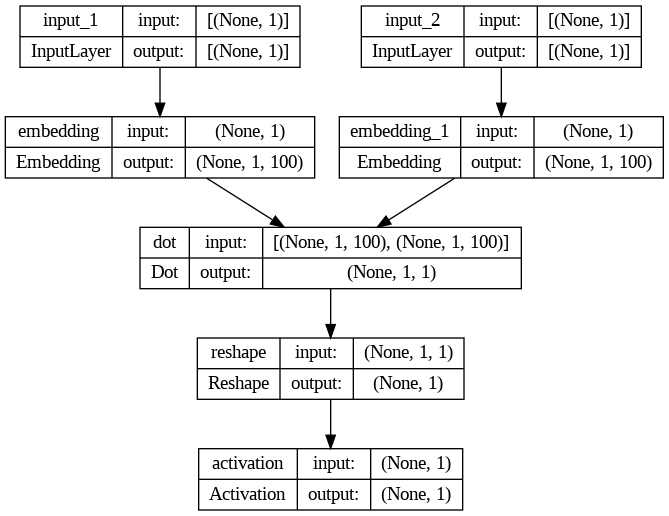

In [39]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [40]:
for _, elem in enumerate(skip_grams):
  first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
  second_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
  print(first_elem)
  print(second_elem)
  print('----------')
  #print(elem)

[ 3248  1034 14848 ...  1034  4027   314]
[ 3248  1034 14848 ...  1034  4027   314]
----------
[ 6498 22063  5767 ...    12  3195    95]
[ 6498 22063  5767 ...    12  3195    95]
----------
[  402  1578  2913 ... 27009   141    11]
[  402  1578  2913 ... 27009   141    11]
----------
[ 112 2527 3291 ...  703 2744  532]
[ 112 2527 3291 ...  703 2744  532]
----------
[9229  413 3882 ...  929 1782  474]
[9229  413 3882 ...  929 1782  474]
----------


In [41]:
for _, elem in enumerate(skip_grams):
  print(elem)

([[3248, 18971], [1034, 3614], [14848, 411], [424, 120], [76, 59549], [97, 45498], [42, 58110], [14848, 57795], [205, 314], [4027, 50821], [7777, 1034], [458, 40579], [1431, 11964], [1703, 65173], [673, 50], [1073, 39002], [13, 7777], [424, 5766], [27005, 693], [4027, 791], [7777, 70098], [3248, 13354], [107, 693], [250, 16675], [1591, 1431], [22061, 67165], [673, 23430], [205, 7202], [4027, 60658], [29, 7777], [37009, 115], [151, 27006], [658, 250], [458, 37591], [151, 54423], [1459, 58541], [95, 16151], [393, 314], [911, 41220], [13, 64060], [29, 1034], [32, 7202], [13, 6861], [411, 15607], [72, 791], [1703, 16869], [314, 53453], [673, 58360], [42, 5017], [5766, 1591], [458, 13], [393, 4027], [95, 33446], [673, 393], [22061, 107], [42, 97], [14848, 658], [37008, 3614], [250, 63018], [4027, 50747], [11552, 137], [37009, 250], [18821, 19284], [1591, 13672], [22061, 35690], [27006, 393], [7777, 29417], [76, 11552], [32, 7777], [4027, 14849], [393, 43815], [151, 37102], [72, 52944], [576

In [42]:
for epoch in range(100):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)
    print('Epoch:', epoch+1, 'Loss: ', loss)

Epoch: 1 Loss:  3.4661762714385986
Epoch: 2 Loss:  3.4591543674468994
Epoch: 3 Loss:  3.4521395564079285
Epoch: 4 Loss:  3.4444929361343384
Epoch: 5 Loss:  3.4359225630760193
Epoch: 6 Loss:  3.4261422157287598
Epoch: 7 Loss:  3.4148702025413513
Epoch: 8 Loss:  3.4018343687057495
Epoch: 9 Loss:  3.3867727518081665
Epoch: 10 Loss:  3.3694372177124023
Epoch: 11 Loss:  3.3495949506759644
Epoch: 12 Loss:  3.32703298330307
Epoch: 13 Loss:  3.301560342311859
Epoch: 14 Loss:  3.273012399673462
Epoch: 15 Loss:  3.241253972053528
Epoch: 16 Loss:  3.206181287765503
Epoch: 17 Loss:  3.167724907398224
Epoch: 18 Loss:  3.125849723815918
Epoch: 19 Loss:  3.080557882785797
Epoch: 20 Loss:  3.0318878293037415
Epoch: 21 Loss:  2.9799142479896545
Epoch: 22 Loss:  2.9247480630874634
Epoch: 23 Loss:  2.866534411907196
Epoch: 24 Loss:  2.805451214313507
Epoch: 25 Loss:  2.7417059540748596
Epoch: 26 Loss:  2.675533652305603
Epoch: 27 Loss:  2.607192426919937
Epoch: 28 Loss:  2.5369611978530884
Epoch: 29 Loss

In [43]:
import gensim

In [44]:
f = open('vectors.txt','w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
#print(vectors)
for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close() #모델을 가져와서 쓰기위해

In [45]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [46]:
w2v.most_similar(positive=['apple'])

[('sfsuvax', 0.41786623001098633),
 ('thiss', 0.40677210688591003),
 ('geschiedt', 0.3665662705898285),
 ('jslb', 0.35721153020858765),
 ('priestly', 0.35647931694984436),
 ('compatability', 0.34905266761779785),
 ('osmaniye', 0.34640997648239136),
 ('gent', 0.34477514028549194),
 ('zfo', 0.3441333770751953),
 ('methodists', 0.3440207540988922)]

In [47]:
w2v.most_similar(positive=['news'])

[('imagination', 0.8825350999832153),
 ('straight', 0.8530662059783936),
 ('group', 0.8241791725158691),
 ('mails', 0.8194519877433777),
 ('construct', 0.8116492629051208),
 ('seen', 0.8014031648635864),
 ('constructs', 0.7941103577613831),
 ('pro', 0.7806825637817383),
 ('combined', 0.779635488986969),
 ('get', 0.7660244703292847)]